In [1]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import os
import shutil
import re
import seaborn as sns
from pathlib import Path

In [2]:
os.listdir(os.path.join(os.getcwd(),"data"))

['export.pkl', 'models', 'scrappedData', 'test', 'train', 'valid']

In [3]:
def split_indices(folder, seed1, seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1, n+1))

    random.seed(seed1)
    train = random.sample(list(range(1, n+1)), int(.5*n))

    remain = list(set(full_set) - set(train))

    random.seed(seed2)
    valid = random.sample(remain, int(.5*len(remain)))
    test = list(set(remain) - set(valid))
    
    return(train, valid, test)

def get_names(waste_type, indices):
    file_names = [waste_type + str(i) + ".jpg" for i in indices]
    return(file_names)    

def move_files(source_files, destination_folder):
    for file in source_files:
        shutil.move(file, destination_folder)

In [4]:
subsets = ['train','valid']
# waste_types = ['cardboard','glass','metal','paper','plastic','trash']
classes = ['babyTurtles', 'debris', 'emptyBeaches', 'plasticsBeach', 
           'cardboard','glass','metal','paper','plastic','trash']
## creating destination folders for data subset and waste type
for subset in subsets:
    for waste_class in classes:
        folder = os.path.join('data', subset, waste_class)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_class in classes:
    source_folder = os.path.join('data', waste_class)
    train_ind, valid_ind, test_ind = split_indices(source_folder, 1, 1)
    
    ## move source files to train
    train_names = get_names(waste_class, train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/" + waste_class
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_class, valid_ind)
    valid_source_files = [os.path.join(source_folder, name) for name in valid_names]
    valid_dest = "data/valid/" + waste_class
    move_files(valid_source_files, valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_class, test_ind)
    test_source_files = [os.path.join(source_folder, name) for name in test_names]
    move_files(test_source_files, "data/test")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data\\babyTurtles'

In [5]:
## confirming path for the images
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Users/monic/Documents/GitHub/DebrisImageClassification/data')

### View data

In [6]:
coastalDebris = ImageDataBunch.from_folder(path, test="test", bs=16, size=224, no_check=True)

In [7]:
coastalDebris

ImageDataBunch;

Train: LabelList (1462 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\monic\Documents\GitHub\DebrisImageClassification\data;

Valid: LabelList (729 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\monic\Documents\GitHub\DebrisImageClassification\data;

Test: LabelList (735 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: C:\Users\monic\Documents\GitHub\DebrisImageClassification\data

In [8]:
print(coastalDebris.classes)

['babyTurtles', 'cardboard', 'debris', 'emptyBeaches', 'glass', 'metal', 'paper', 'plastic', 'plasticsBeach', 'trash']


In [9]:
print(coastalDebris.train_ds)

LabelList (1462 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\monic\Documents\GitHub\DebrisImageClassification\data


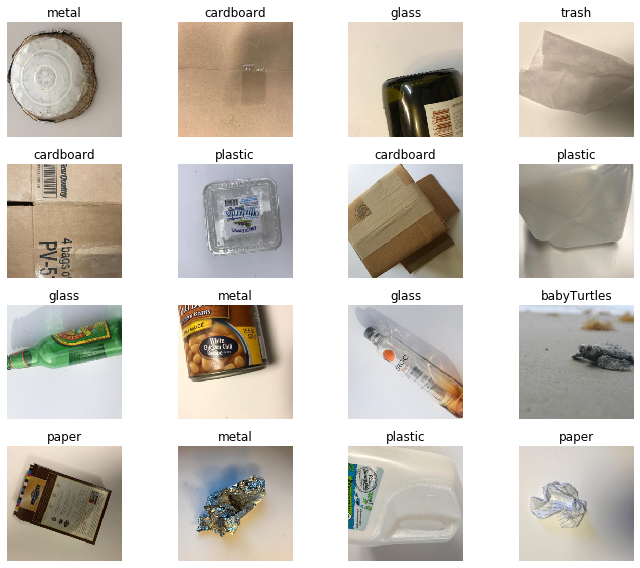

In [10]:
#showing pictures as a test
coastalDebris.show_batch(rows=10, figsize=(10,8))

### Train model

In [11]:
learn = cnn_learner(coastalDebris,models.resnet34,metrics=error_rate)

In [12]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.02E-02
Min loss divided by 10: 3.55E-03


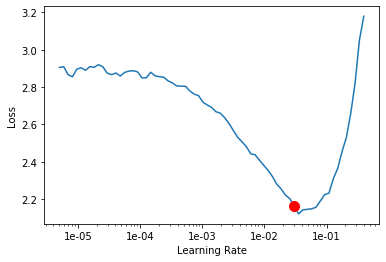

In [13]:
#showing learning rate

learn.lr_find(start_lr=1e-6, end_lr=1e1)
learn.recorder.plot(suggestion=True)
# learn.recorder.plot()

In [14]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.030199517204020167

In [15]:
#running epochs
learn.fit_one_cycle(20, max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.743947,0.920035,0.275720,01:04
1,1.034084,0.562674,0.208505,01:04
2,0.690703,0.508338,0.183813,01:04
3,0.564209,0.643337,0.192044,01:03
4,0.700523,0.761458,0.255144,01:04
5,0.674368,0.664514,0.218107,01:03
6,0.623062,0.653031,0.222222,01:03
7,0.579053,0.631901,0.179698,01:04
8,0.491845,0.570224,0.183813,01:04
9,0.380118,0.531659,0.172840,01:03


In [16]:
learn.save('debrisClassifierStage-1')

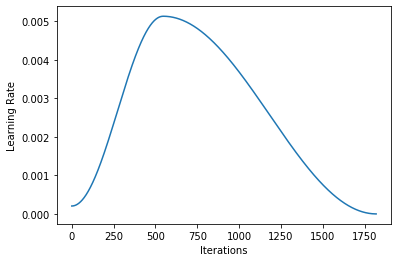

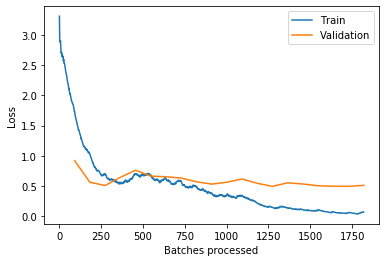

In [17]:
learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [ ]:
#learn.recorder.plot()

In [ ]:
#learn.fit_one_cycle(20, max_lr=2.69E-03)

In [ ]:
# NEGATE: USE THE FIRST ONE
#learn.recorder.plot(suggestion=True)

### Interpretation

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [19]:
#using torch + tensor to get the highest error pictures
torch.Tensor.ndim = property(lambda x: len(x.size()))

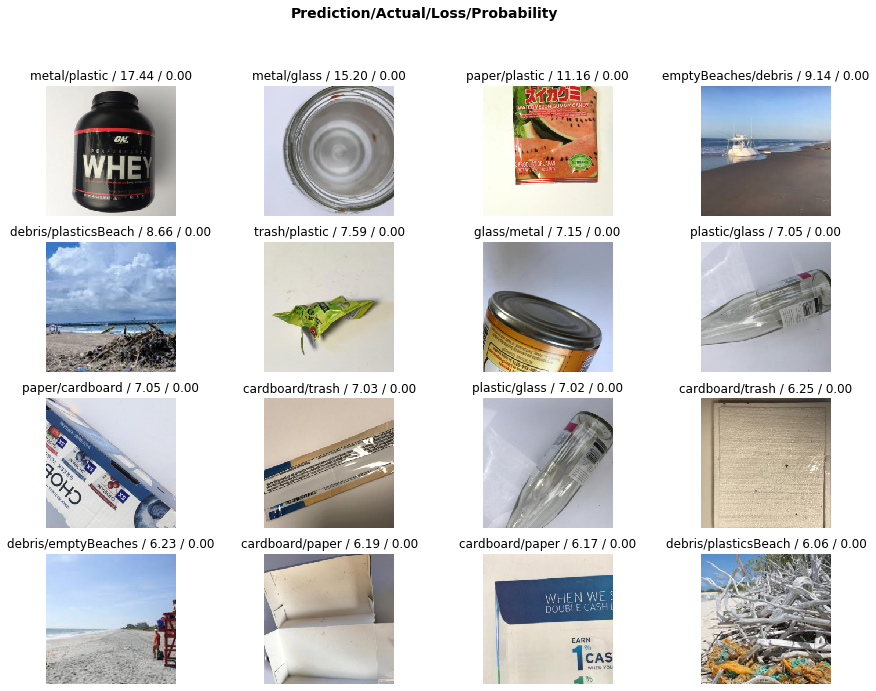

In [20]:
#shows the top 16 images that were identified incorrectly along with their statistics
interp.plot_top_losses(16, figsize=(15,11))

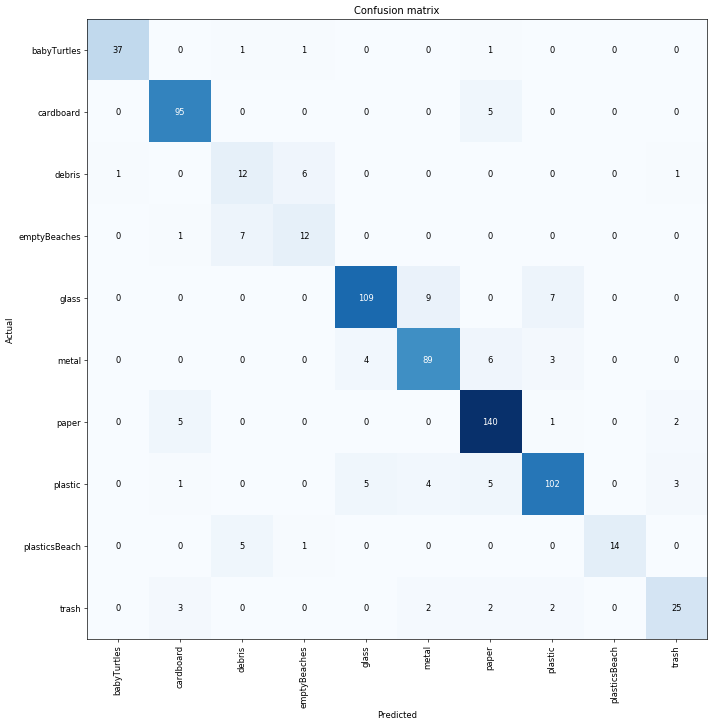

In [21]:
#confusion matrix shows that glass was confused for metal the most
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [22]:
interp.most_confused(min_val=2)

[('glass', 'metal', 9),
 ('emptyBeaches', 'debris', 7),
 ('glass', 'plastic', 7),
 ('debris', 'emptyBeaches', 6),
 ('metal', 'paper', 6),
 ('cardboard', 'paper', 5),
 ('paper', 'cardboard', 5),
 ('plastic', 'glass', 5),
 ('plastic', 'paper', 5),
 ('plasticsBeach', 'debris', 5),
 ('metal', 'glass', 4),
 ('plastic', 'metal', 4),
 ('metal', 'plastic', 3),
 ('plastic', 'trash', 3),
 ('trash', 'cardboard', 3),
 ('paper', 'trash', 2),
 ('trash', 'metal', 2),
 ('trash', 'paper', 2),
 ('trash', 'plastic', 2)]

In [23]:
#trying to get a higher accuracy rate!
#learner.predict() only predicts on a single image, while learner.get_preds() 
#predicts on a set of images.
preds = learn.get_preds(ds_type=DatasetType.Test)

In [24]:
print(preds[0].shape)
preds[0]

torch.Size([735, 10])


tensor([[9.9998e-01, 6.0640e-10, 2.1923e-07,  ..., 1.1887e-05, 4.0596e-07,
         1.4484e-09],
        [9.9999e-01, 1.5106e-07, 9.0938e-09,  ..., 5.0352e-09, 5.2233e-08,
         2.0943e-10],
        [1.7279e-02, 3.2654e-02, 7.5122e-02,  ..., 8.9337e-04, 7.2707e-05,
         1.2814e-02],
        ...,
        [9.2133e-04, 5.3070e-03, 3.8421e-04,  ..., 1.1259e-02, 1.5981e-05,
         7.7595e-01],
        [1.5921e-07, 2.8260e-05, 1.2257e-06,  ..., 4.7216e-06, 2.3369e-08,
         9.8447e-01],
        [3.9204e-05, 7.3487e-01, 2.1929e-04,  ..., 4.1186e-04, 1.0777e-05,
         1.0196e-01]])

In [25]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [26]:
yhat = []
for max_idx in max_idxs:
    yhat.append(coastalDebris.classes[max_idx])

In [27]:
# yhat

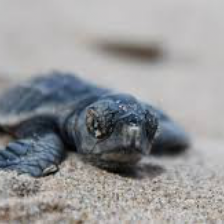

In [28]:
learn.data.test_ds[0][0]

In [29]:
y = []

for label_path in coastalDebris.test_ds.items:
    y.append(str(label_path))
#     print(label_path)
# pattern = re.compile("([a-z]+)[0-9]+")
pattern = re.compile("([A-Za-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [30]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

#only one was wrong in this set

['babyTurtles', 'babyTurtles', 'emptyBeaches', 'babyTurtles', 'babyTurtles']
['babyTurtles', 'babyTurtles', 'babyTurtles', 'babyTurtles', 'babyTurtles']


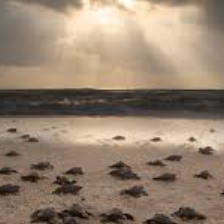

In [31]:
learn.data.test_ds[2][0]
#this is the picture that was predicted wrong by the machine

In [32]:
cm = confusion_matrix(y, yhat)
print(cm)

[[ 36   0   0   2 ...   0   1   0   1]
 [  0  96   0   0 ...   5   0   0   0]
 [  1   0   6   7 ...   0   1   5   0]
 [  0   0   4  15 ...   0   0   1   0]
 ...
 [  0   0   0   0 ... 145   0   0   3]
 [  0   0   0   0 ...   1 112   0   4]
 [  1   0   5   0 ...   1   0  13   0]
 [  1   1   0   0 ...   3   2   0  28]]


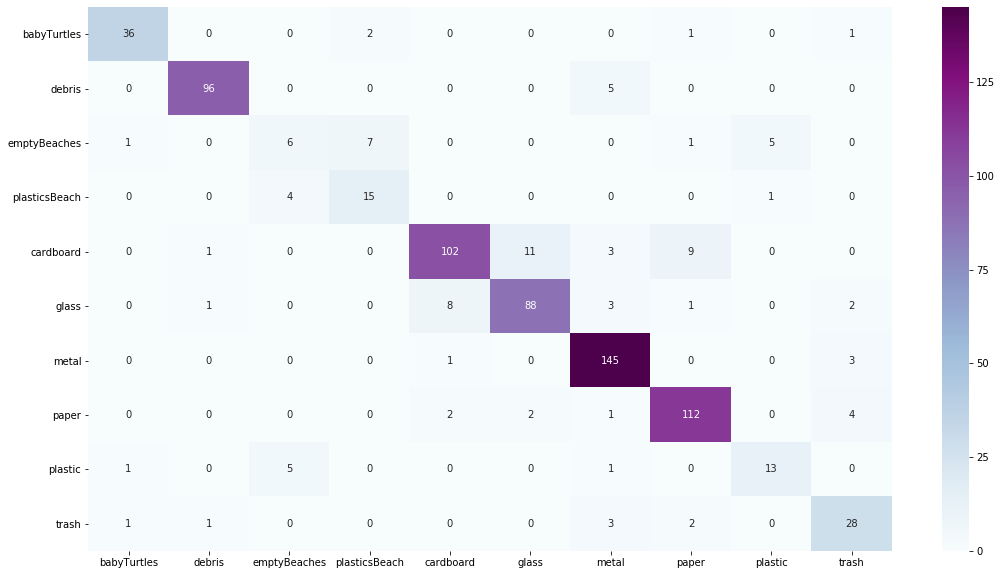

In [34]:
df_cm = pd.DataFrame(cm, classes, classes) # changed waste_types to classes

plt.figure(figsize=(18,10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="BuPu")
plt.autoscale()
#used seaborn heatmaps library to make it pretty
#need to fix this because it's cut off but it shows most of the data
#edit: fixed with plt.autoscale!

### Metrics

In [35]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]
            
#accuracy equation! assigning correct to how much the machine got right

In [36]:
#putting correct into the accuracy equation divided by the total amount
accuracy = correct/sum(sum(cm))
precision = Precision()
recall = Recall()

print("Accuracy:", accuracy)
# # print("Mean Squared Error:", mse)
# print("Precision:", precision)
# print("Recall:", recall)

Accuracy: 0.8721088435374149


In [38]:
learn.validate()

[0.51113534, tensor(0.1289)]

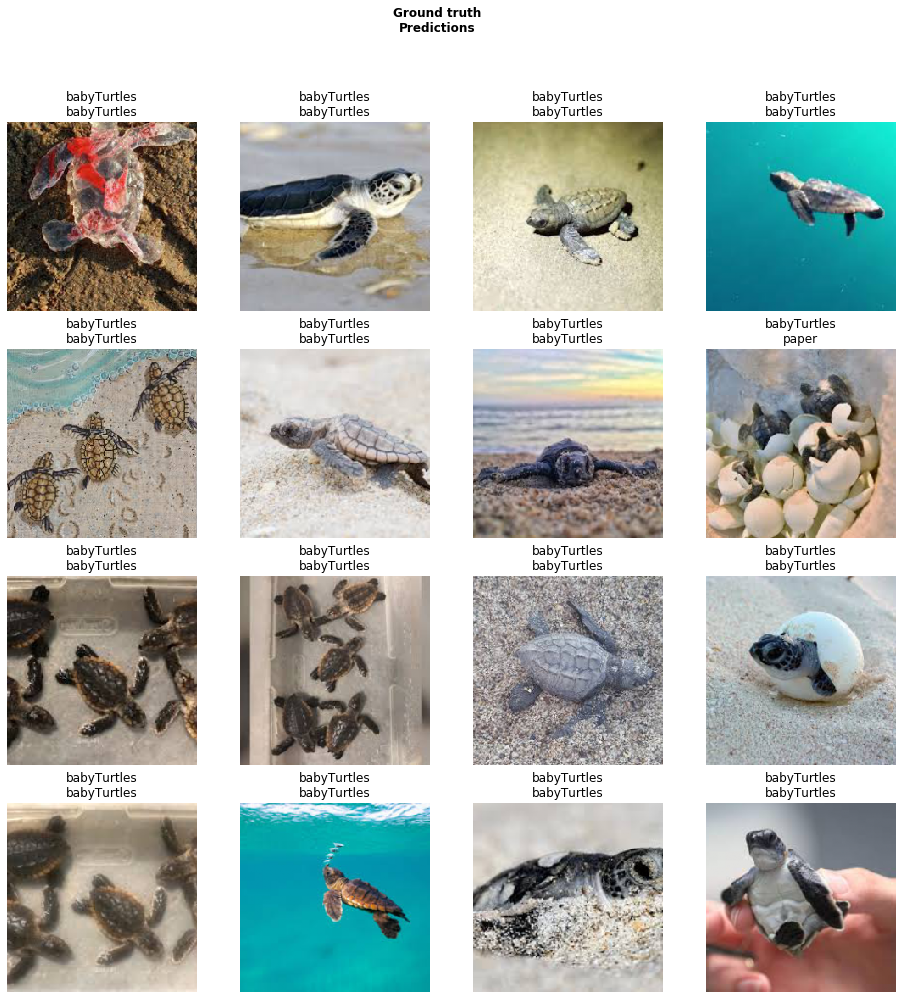

In [39]:
learn.show_results()

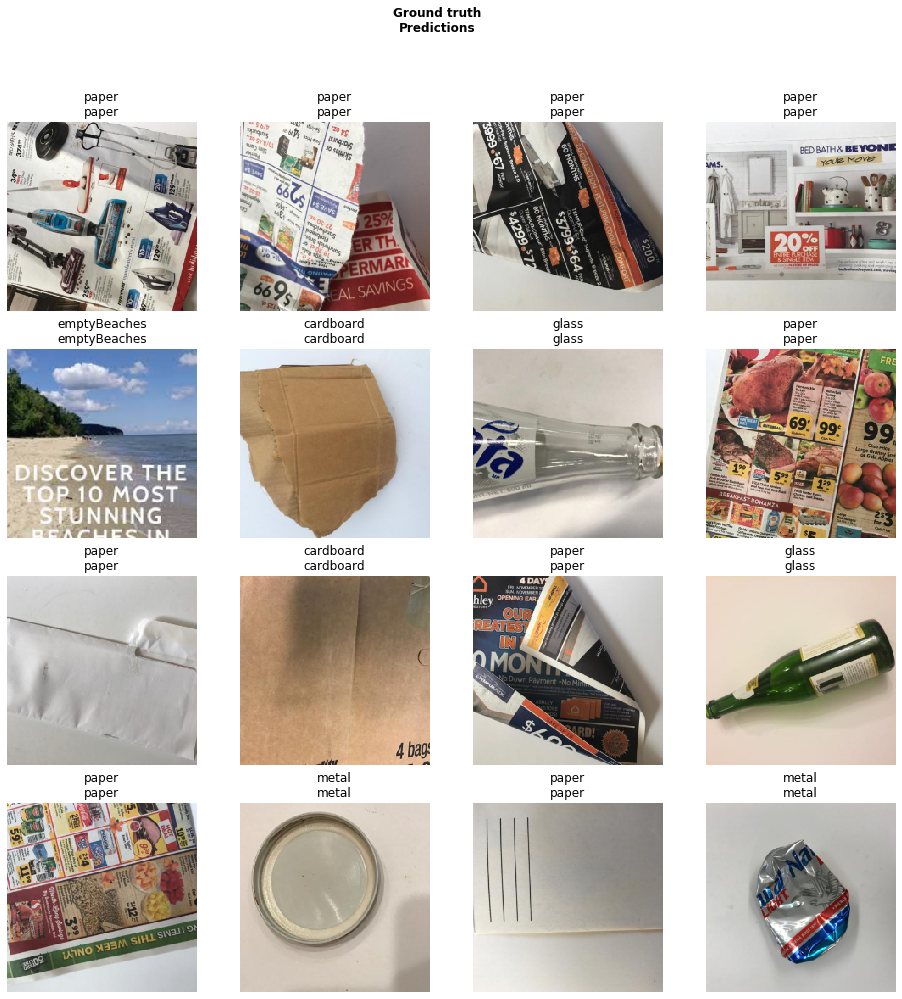

In [40]:
learn.show_results(ds_type=DatasetType.Train)

In [41]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [42]:
learn.recorder.plot_metrics()

TypeError: object of type 'function' has no len()

In [ ]:
learn.export()

In [ ]:
defaults.device = torch.device('cpu')

In [96]:
import urllib.request
user_input = input()

https://previews.123rf.com/images/hecke/hecke1801/hecke180100561/94768328-baby-turtle-sea-turtles-on-the-beaches-of-sri-lanka.jpg


In [90]:
#clear yhat for single image predictor
yhat = []

In [91]:
url = user_input
filename = 'input.png'
urllib.request.urlretrieve(url, filename)

img = open_image('input.png')
pred_class, pred_idx, outputs = learn.predict(img)

In [92]:
newimg = learn.predict(img)

In [95]:
coastalDebris.classes[pred_idx]

'babyTurtles'

In [65]:
#HUGE credits to https://medium.com/ml-and-automation/deep-learning-a-step-by-step-guide-using-fastai-9a5c55f9e4ce
#referenced this page so much
#dataset was sourced from kaggle 
#https://www.kaggle.com/asdasdasasdas/garbage-classification